In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,month,decade_built,id,date,yr_renovated,zipcode,lat,long,view,waterfront
0,0,905000.0,4,3.50,2980,3000,2.0,3,9,2340,...,8,2000,9528104660,2014-08-27,0,98115,47.6768,-122.326,0,0
1,1,903000.0,2,1.50,1140,7800,1.0,4,6,1140,...,12,1940,4389200610,2014-12-01,0,98004,47.6142,-122.209,0,0
2,2,902000.0,4,2.50,3030,8507,2.0,3,9,3030,...,6,2000,3889100027,2014-06-16,0,98033,47.6675,-122.176,0,0
3,3,902000.0,4,2.25,2530,9200,1.0,5,9,1570,...,5,1970,7856610200,2014-05-23,0,98006,47.5612,-122.152,0,0
4,4,901000.0,4,3.25,1560,4080,1.0,3,7,1560,...,4,1910,2492200335,2015-04-23,0,98126,47.5347,-122.380,0,0


In [8]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,sqft_lot15,month,decade_built,id,yr_renovated,zipcode,lat,long,view,waterfront
count,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,13896.000000,...,13896.000000,13896.000000,13896.000000,1.389600e+04,13896.0,13896.000000,13896.000000,13896.000000,13896.0,13896.0
mean,6947.500000,417297.448690,3.187104,1.916073,1718.008708,6764.203008,1.449806,3.423647,7.287709,1507.894070,...,6715.136946,6.571387,1965.357657,4.686961e+09,0.0,98081.538572,47.557436,-122.239353,0.0,0.0
std,4011.574005,162687.602248,0.784866,0.644198,552.595147,3125.284767,0.547837,0.650683,0.808454,542.800664,...,2857.062264,3.128059,29.495973,2.850988e+09,0.0,53.857684,0.143743,0.115732,0.0,0.0
min,0.000000,82000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,2.000000,5.000000,370.000000,...,651.000000,1.000000,1900.000000,2.800031e+06,0.0,98001.000000,47.189500,-122.472000,0.0,0.0
25%,3473.750000,290000.000000,3.000000,1.500000,1300.000000,4549.000000,1.000000,3.000000,7.000000,1100.000000,...,4691.500000,4.000000,1950.000000,2.291400e+09,0.0,98033.000000,47.452275,-122.338000,0.0,0.0
50%,6947.500000,390000.000000,3.000000,2.000000,1670.000000,6930.000000,1.000000,3.000000,7.000000,1380.000000,...,7081.500000,6.000000,1970.000000,4.006000e+09,0.0,98074.000000,47.568900,-122.275000,0.0,0.0
75%,10421.250000,525000.000000,4.000000,2.500000,2100.000000,8721.000000,2.000000,4.000000,8.000000,1810.000000,...,8521.500000,9.000000,1990.000000,7.338001e+09,0.0,98119.000000,47.684400,-122.163000,0.0,0.0
max,13895.000000,905000.000000,5.000000,3.750000,3370.000000,16117.000000,3.000000,5.000000,9.000000,3135.000000,...,15265.000000,12.000000,2010.000000,9.900000e+09,0.0,98199.000000,47.777600,-121.893000,0.0,0.0


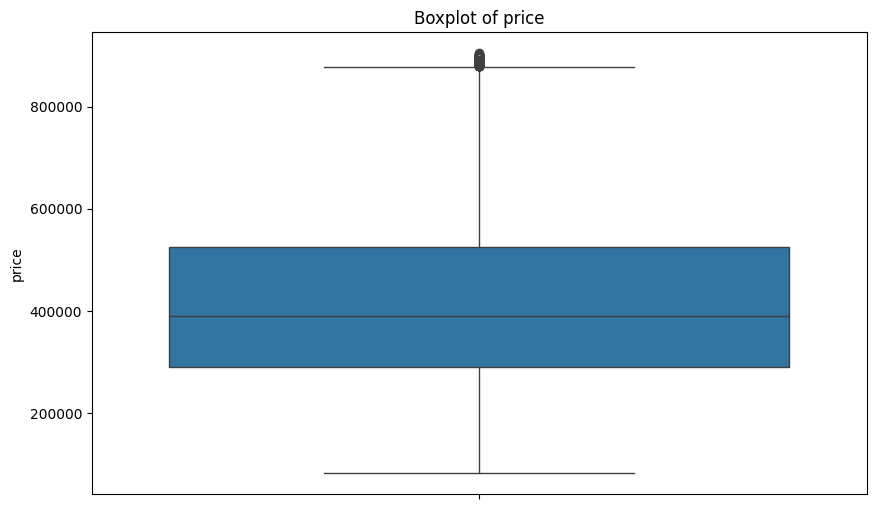

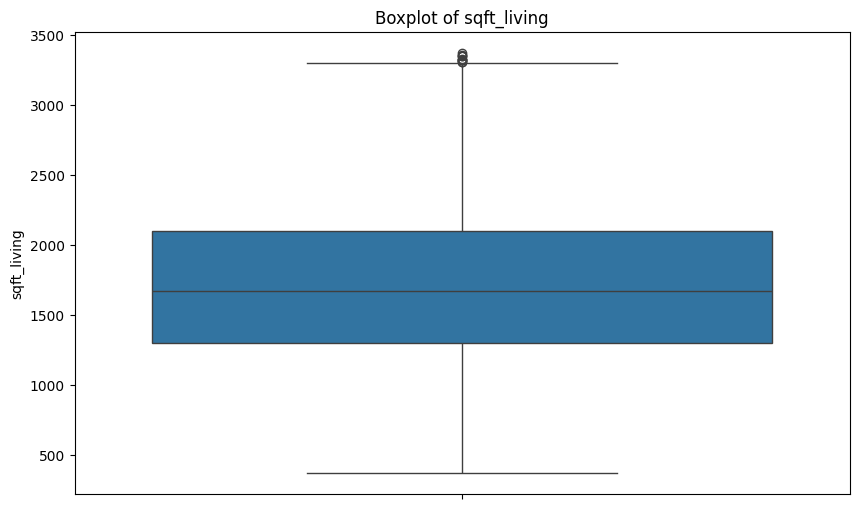

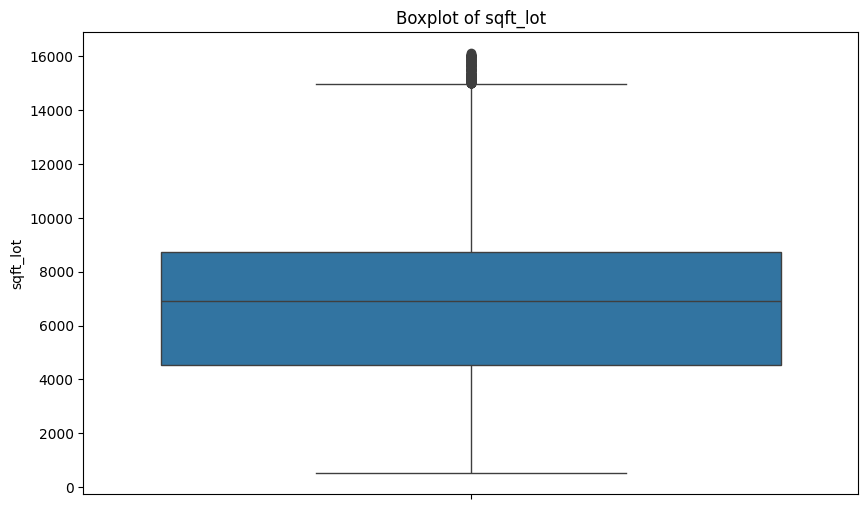

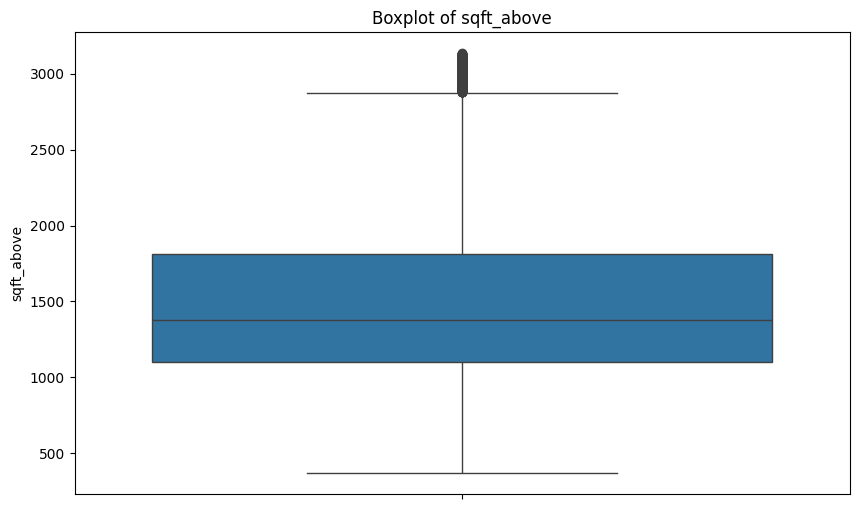

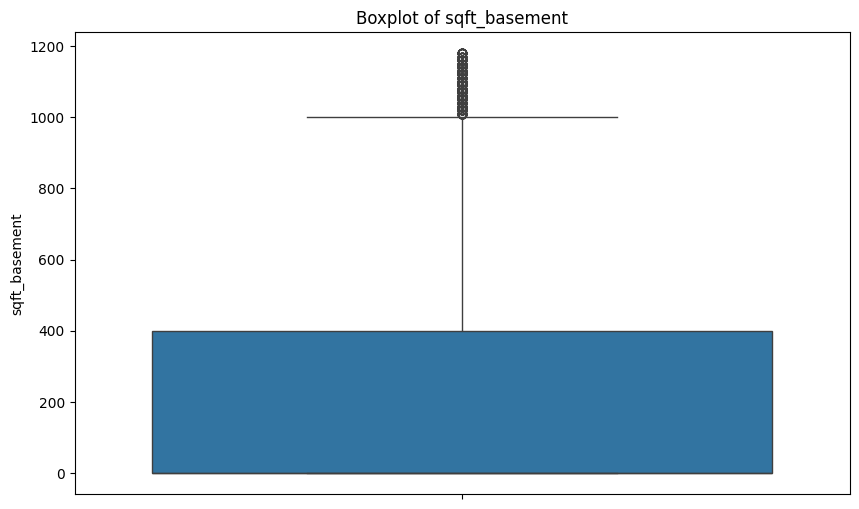

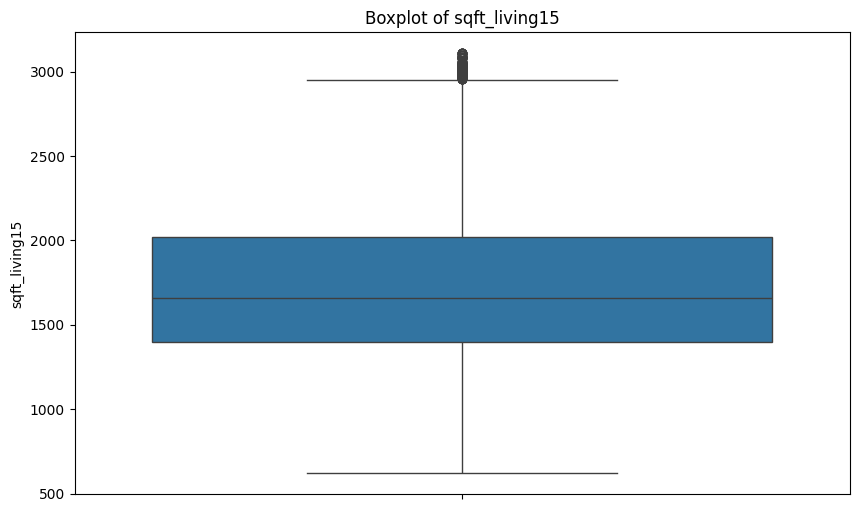

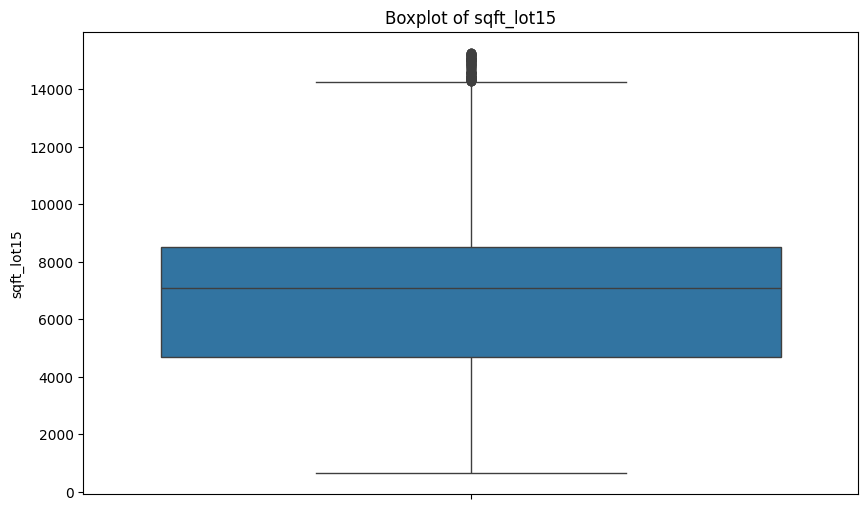

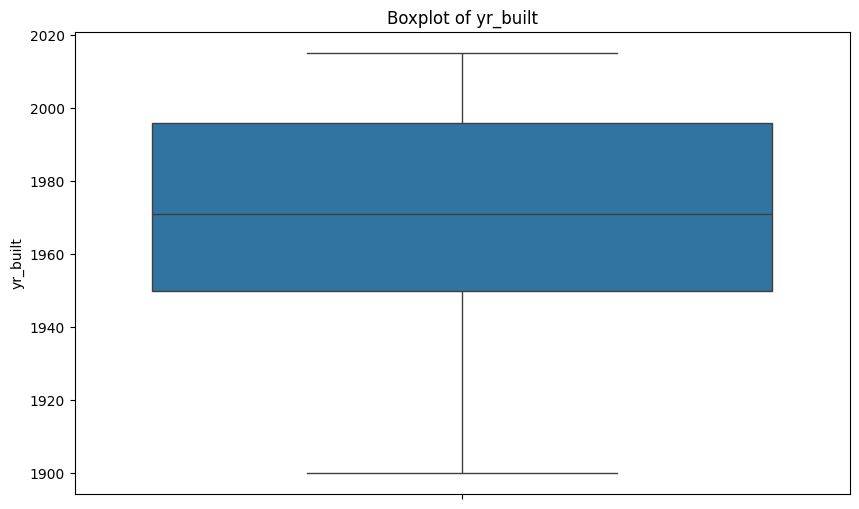

In [15]:
reno_years = df['yr_renovated']!=0

cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built']

# Plot boxplots for each column
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [18]:
df['yr_renovated'].sort_values(ascending=False)

0        0
9268     0
9257     0
9258     0
9259     0
        ..
4635     0
4636     0
4637     0
4638     0
13895    0
Name: yr_renovated, Length: 13896, dtype: int64